## Import

In [1]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 초등 학생별 수준 군집화

In [3]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
%cd /content/drive/MyDrive/강의자료/머신러닝기초/4일차_차원축소와군집화

In [171]:
middle1_score_df = pd.read_csv('./datasets/중1_밀크T중학_AI진단평가_개인별전과목점수.csv',index_col=0)

In [255]:
middle1_score_df[['국어','영어','수학','과학','사회','역사']].dropna()

,국어,영어,수학,과학,사회,역사
3,68.0,86.0,57.0,15.0,53.0,45.0
10,79.0,93.0,46.0,30.0,45.0,15.0
13,93.0,100.0,48.0,56.0,63.0,100.0
23,100.0,100.0,88.0,61.0,90.0,33.0
32,93.0,100.0,65.0,53.0,45.0,90.0
...,...,...,...,...,...,...
1888,86.0,68.0,94.0,90.0,100.0,79.0
2014,65.0,58.0,63.0,0.0,0.0,0.0
2349,54.0,79.0,51.0,90.0,90.0,71.0
3165,47.0,93.0,55.0,30.0,100.0,71.0


In [256]:
input_data = middle1_score_df[['국어','영어','수학','과학','사회','역사']].dropna()

In [257]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(input_data)
score_pca = pca.transform(input_data)

In [258]:
score_pca

array([[ 3.77764708e+01,  1.74483161e+01],
       [ 5.17573729e+01,  9.20640150e-01],
       [-2.10363708e+01,  4.82666997e+01],
       [-1.62628942e+01, -2.35793017e+01],
       [-1.25061280e+01,  5.08201270e+01],
       [-3.55032717e+01,  1.23167879e+01],
       [ 8.37152372e+01,  1.98641842e+01],
       [ 8.91956447e+01,  1.21069997e-01],
       [ 7.42148766e+01,  5.61803421e+00],
       [ 5.15859858e+01,  3.53268223e+01],
       [ 2.16580740e+01,  2.82836028e+01],
       [-3.96346985e+00,  1.83793507e+01],
       [ 7.18272345e+01,  2.28043832e-01],
       [-2.40119326e+01,  3.55630986e+01],
       [-8.03199494e+00, -2.03091093e+01],
       [ 4.71684311e+01,  2.27538645e+01],
       [-2.24624896e+01,  1.97965653e+01],
       [-3.93122300e+01,  3.00497561e+01],
       [ 1.33354785e+01,  4.66661089e+01],
       [-7.42797364e+00,  7.48261047e+00],
       [-3.66880591e+01,  2.09079428e+01],
       [-4.15167736e+01,  2.13772491e+01],
       [ 1.96591147e+01,  7.35140693e+00],
       [ 2.

In [259]:
# PCA 환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1','pca_component_2']
data_pca = pd.DataFrame(score_pca, columns=pca_columns)
data_pca

,pca_component_1,pca_component_2
0,37.776471,17.448316
1,51.757373,0.920640
2,-21.036371,48.266700
3,-16.262894,-23.579302
4,-12.506128,50.820127
...,...,...
346,-52.736781,-5.040470
347,99.205888,18.381238
348,-23.243371,-0.324138
349,-2.795940,2.950650


In [260]:
gmm_pca = GaussianMixture(n_components=3, random_state = 42)
gmm_labels_pca = gmm.fit_predict(data_pca)
data_gmm_pca = pd.DataFrame(gmm_labels_pca, columns=['pca_gmm_cluster'])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [261]:
input_data

,국어,영어,수학,과학,사회,역사
3,68.0,86.0,57.0,15.0,53.0,45.0
10,79.0,93.0,46.0,30.0,45.0,15.0
13,93.0,100.0,48.0,56.0,63.0,100.0
23,100.0,100.0,88.0,61.0,90.0,33.0
32,93.0,100.0,65.0,53.0,45.0,90.0
...,...,...,...,...,...,...
1888,86.0,68.0,94.0,90.0,100.0,79.0
2014,65.0,58.0,63.0,0.0,0.0,0.0
2349,54.0,79.0,51.0,90.0,90.0,71.0
3165,47.0,93.0,55.0,30.0,100.0,71.0


In [262]:
input_data_pca = pd.concat([input_data.reset_index(drop=True), data_gmm_pca], axis=1)

In [263]:
input_data_pca

,국어,영어,수학,과학,사회,역사,pca_gmm_cluster
0,68.0,86.0,57.0,15.0,53.0,45.0,0
1,79.0,93.0,46.0,30.0,45.0,15.0,0
2,93.0,100.0,48.0,56.0,63.0,100.0,0
3,100.0,100.0,88.0,61.0,90.0,33.0,0
4,93.0,100.0,65.0,53.0,45.0,90.0,0
...,...,...,...,...,...,...,...
346,86.0,68.0,94.0,90.0,100.0,79.0,1
347,65.0,58.0,63.0,0.0,0.0,0.0,2
348,54.0,79.0,51.0,90.0,90.0,71.0,1
349,47.0,93.0,55.0,30.0,100.0,71.0,0


In [282]:
def ploting_score(df,col):
    f, ax = plt.subplots(2,3)
    f.set_size_inches((25,10))

    plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
    
    ############ 1 ###############

    sns.histplot(df[df[col] == 0]['국어'].tolist(),
                color="tomato", ax = ax[0,0])
    sns.histplot(df[df[col] == 1]['국어'].tolist(),
                color="mediumorchid", ax = ax[0,0])
    sns.histplot(df[df[col] == 2]['국어'].tolist(),
                color="gold", ax = ax[0,0])
    ax[0,0].set_title('Korean')
    ax[0,0].set_xlim([-10,110])

    ############ 2 ###############

    sns.histplot(df[df[col] == 0]['수학'].tolist(),
                color="tomato", ax = ax[0,1])
    sns.histplot(df[df[col] == 1]['수학'].tolist(),
                color="mediumorchid", ax = ax[0,1])
    sns.histplot(df[df[col] == 2]['수학'].tolist(),
                color="gold", ax = ax[0,1])
    ax[0,1].set_title('Math')
    ax[0,1].set_xlim([-10,110])


    ############ 3 ###############
    sns.histplot(df[df[col] == 0]['영어'].tolist(),
                color="tomato",ax = ax[0,2])
    sns.histplot(df[df[col] == 1]['영어'].tolist(),
                color="mediumorchid", ax = ax[0,2])
    sns.histplot(df[df[col] == 2]['영어'].tolist(),
                color="gold", ax = ax[0,2])
    ax[0,2].set_title('English')
    ax[0,2].set_xlim([-10,110])

    ############ 4 ###############
    sns.histplot(df[df[col] == 0]['사회'].tolist(),
                color="tomato", ax = ax[1,0])
    sns.histplot(df[df[col] == 1]['사회'].tolist(),
                color="mediumorchid", ax = ax[1,0])
    sns.histplot(df[df[col] == 2]['사회'].tolist(),
                color="gold", ax = ax[1,0])
    ax[1,0].set_title('Social')
    ax[1,0].set_xlim([-10,110])

    ############ 5 ###############
    sns.histplot(df[df[col] == 0]['과학'].tolist(),
                color="tomato", ax = ax[1,1])
    sns.histplot(df[df[col] == 1]['과학'].tolist(),
                color="mediumorchid", ax = ax[1,1])
    sns.histplot(df[df[col] == 2]['과학'].tolist(),
                color="gold", ax = ax[1,1])
    ax[1,1].set_title('Science')
    ax[1,1].set_xlim([-10,110])

    ############ 6 ###############
    sns.histplot(df[df[col] == 0]['역사'].tolist(),
                color="tomato", ax = ax[1,2])
    sns.histplot(df[df[col] == 1]['역사'].tolist(),
                color="mediumorchid", ax = ax[1,2])
    sns.histplot(df[df[col] == 2]['역사'].tolist(),
                color="gold", ax = ax[1,2])
    ax[1,2].set_title('History')
    ax[1,2].set_xlim([-10,110])

    plt.xlim(0,100)
    plt.show()

### 과제

#### 1. PCA 진행하지 않고, GMM 적용해보기(결과만 시각화)

In [283]:
gmm = GaussianMixture(n_components=3, random_state = 42)
gmm_labels = gmm.fit_predict(input_data)
input_data_gmm = input_data.copy()
input_data_gmm['gmm_cluster'] = gmm_labels

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [284]:
input_data_gmm

,국어,영어,수학,과학,사회,역사,gmm_cluster
3,68.0,86.0,57.0,15.0,53.0,45.0,0
10,79.0,93.0,46.0,30.0,45.0,15.0,0
13,93.0,100.0,48.0,56.0,63.0,100.0,0
23,100.0,100.0,88.0,61.0,90.0,33.0,1
32,93.0,100.0,65.0,53.0,45.0,90.0,0
...,...,...,...,...,...,...,...
1888,86.0,68.0,94.0,90.0,100.0,79.0,1
2014,65.0,58.0,63.0,0.0,0.0,0.0,2
2349,54.0,79.0,51.0,90.0,90.0,71.0,0
3165,47.0,93.0,55.0,30.0,100.0,71.0,0


### 결과 과목별 시각화

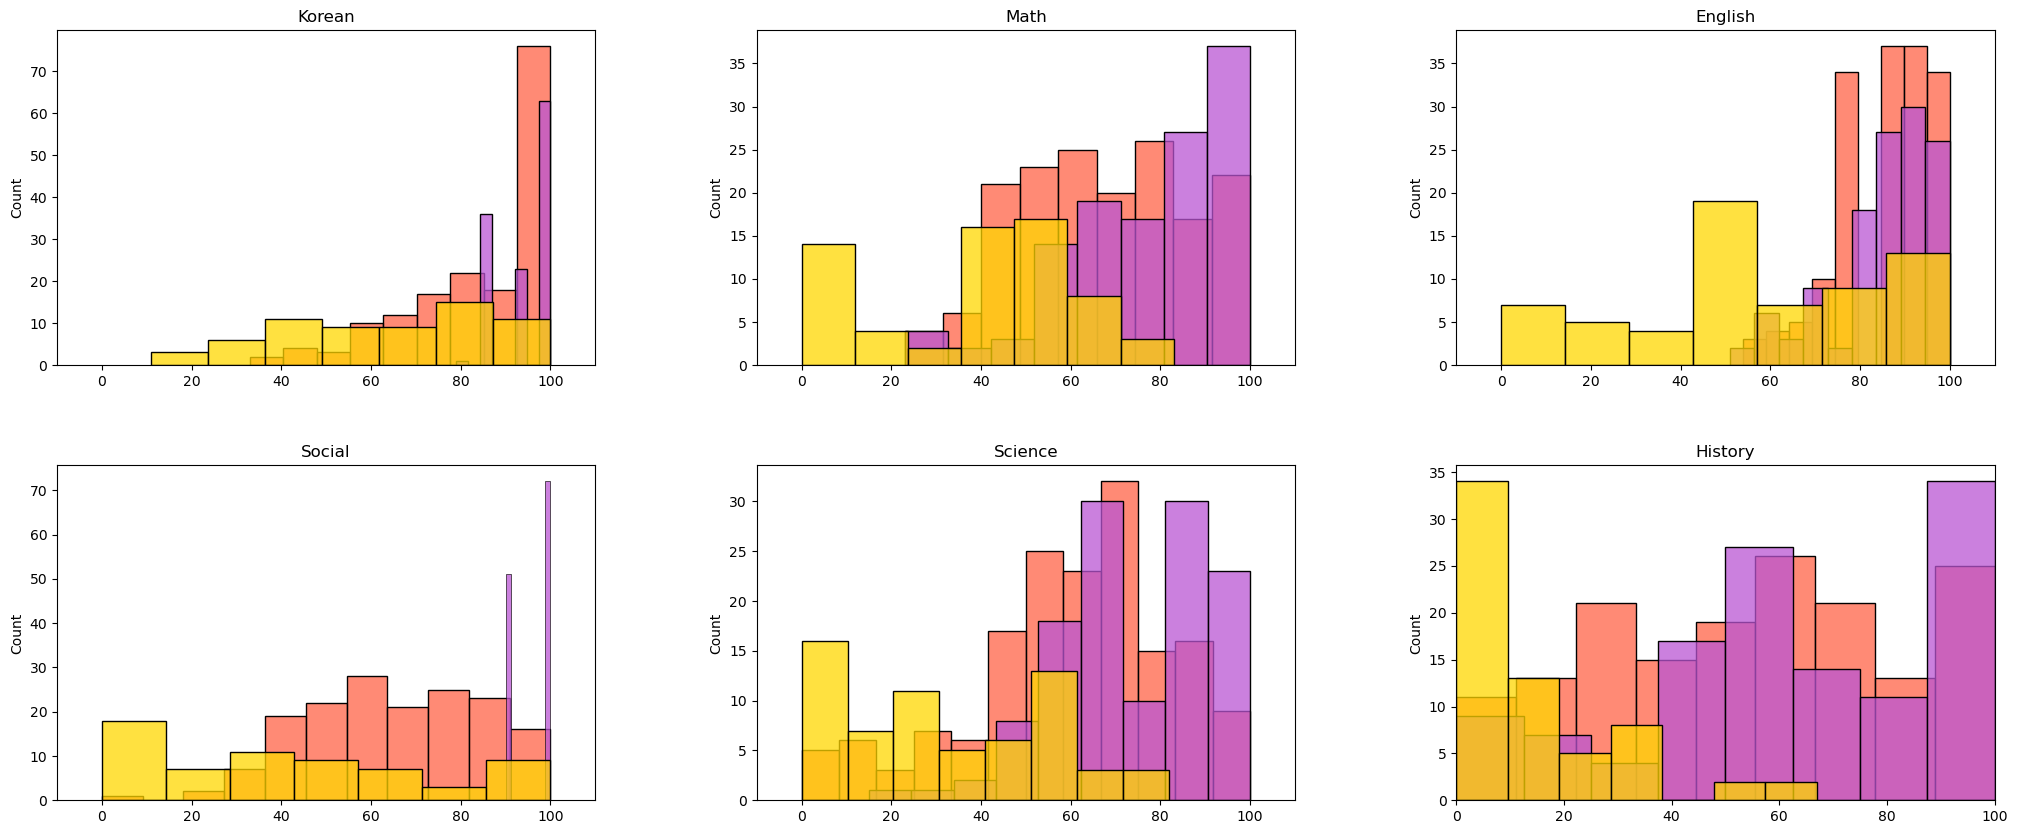

In [285]:
#gmm만 이용
ploting_score(input_data_gmm,'gmm_cluster')

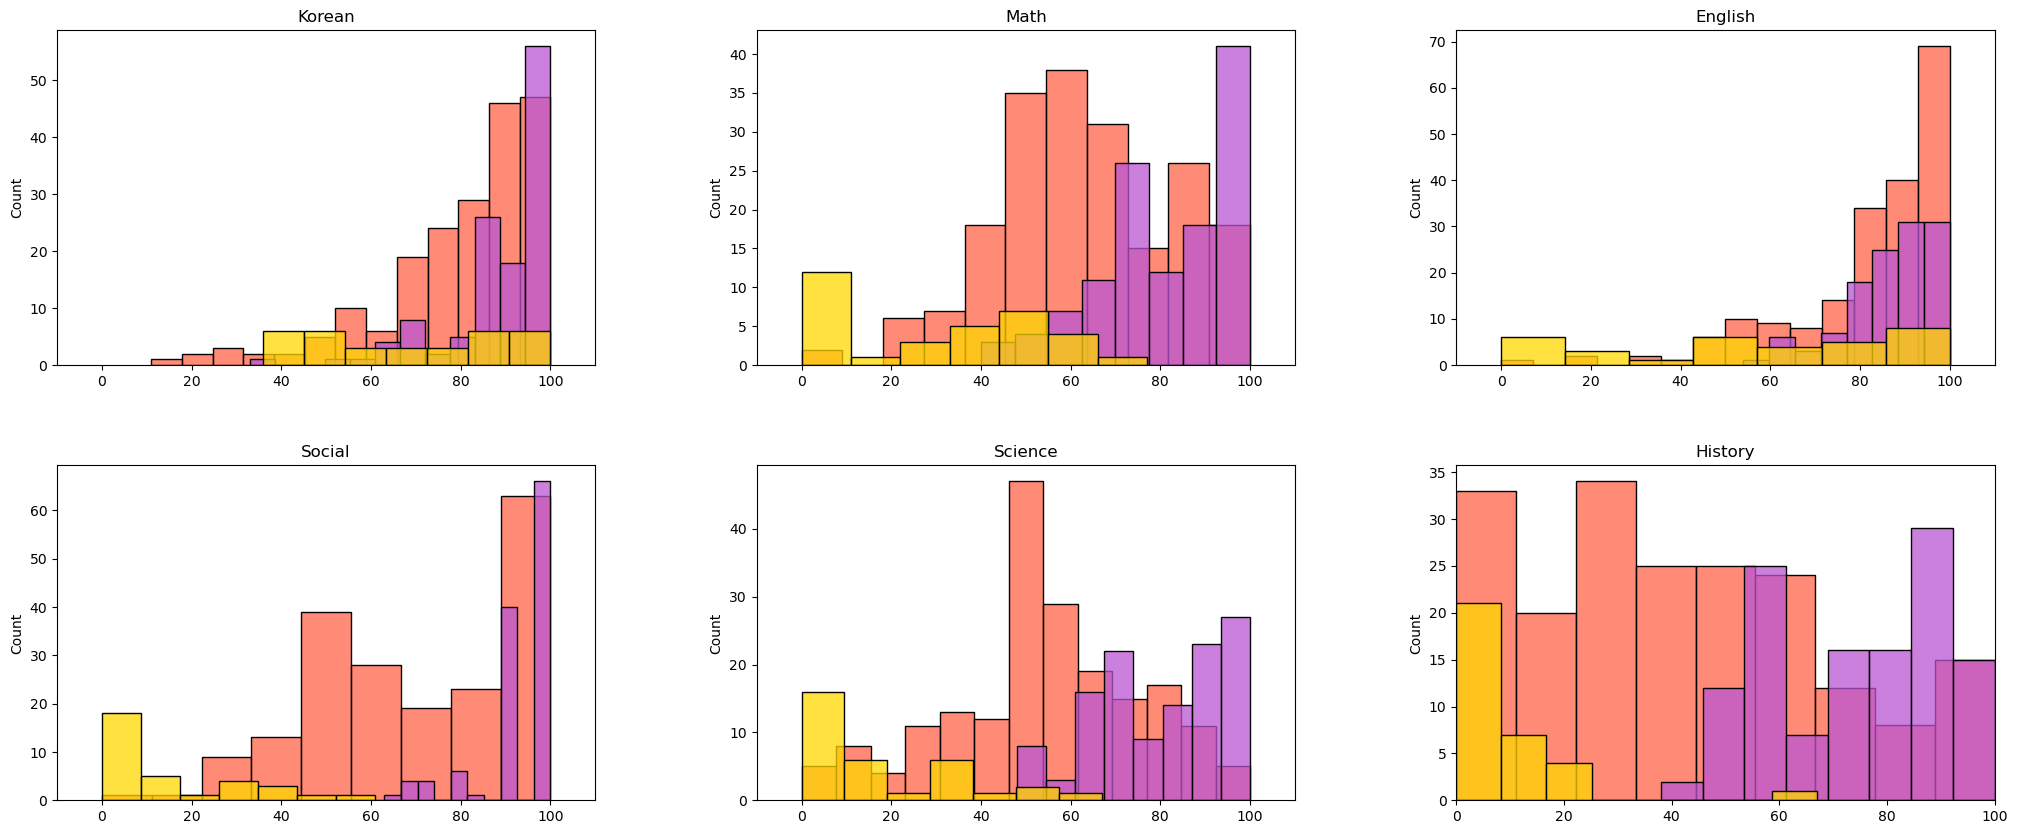

In [286]:
# pca & gmm이용
ploting_score(input_data_pca,'pca_gmm_cluster')

-> 같은 데이터임에도 PCA를 진행한 분포와 진행하지 않고 진행한 분포가 다르게 나타남을 확인 할 수 있다.

## 2. 국어와 수학과목의 성적이 유사한 사용자끼리 묶이도록 K-means 활용하여 5개의 군집 만들기

### GMM을 이용 

In [88]:
## X : 국어 , Y : 수학

input_data_re=input_data[['국어', '수학']]

gmm = GaussianMixture(n_components=5, random_state = 42)
gmm_labels = gmm.fit_predict(input_data_re)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [89]:
gmm_labels=pd.DataFrame(gmm_labels, columns=['gmm_cluster'])

In [90]:
input_data_re = pd.concat([input_data_re.reset_index(drop=True),gmm_labels],axis=1)

In [91]:
input_data_re

,국어,수학,gmm_cluster
0,68.0,57.0,1
1,79.0,46.0,2
2,93.0,48.0,2
3,100.0,88.0,3
4,93.0,65.0,3
...,...,...,...
346,86.0,94.0,0
347,65.0,63.0,1
348,54.0,51.0,1
349,47.0,55.0,1


In [291]:
def plt_gmm():

    markers=['^', 's', 'o','*','+']

    plt.figure(figsize=(8, 4))

    for i, marker in enumerate(markers):
        x_axis_data = input_data_re[input_data_re['gmm_cluster']==i]['국어']
        y_axis_data = input_data_re[input_data_re['gmm_cluster']==i]['수학']
        plt.scatter(x_axis_data, y_axis_data, marker=marker, label=f'Cluster {i}')


    plt.xlabel('Korean')
    plt.ylabel('Math')
    plt.legend(fontsize = 10)

    plt.show()

### k-means이용 

In [292]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [293]:
X = input_data_re[['국어', '수학']]

In [294]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [295]:
np.unique(y_pred)

array([0, 1, 2, 3, 4])

In [296]:
result = pd.concat([pd.DataFrame(X,columns=['국어','수학']),pd.DataFrame(y_pred,columns=['gmm_cluster'])], axis=1)
result

,국어,수학,gmm_cluster
0,68.0,57.0,4
1,79.0,46.0,3
2,93.0,48.0,3
3,100.0,88.0,1
4,93.0,65.0,0
...,...,...,...
346,86.0,94.0,1
347,65.0,63.0,4
348,54.0,51.0,4
349,47.0,55.0,4


In [297]:
X = np.array(X)

In [298]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    # 바탕 그리기
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")

    # 결정 경계 그리기
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')

    # 훈련 데이터셋과 센트로이드 그리기
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)



In [299]:
def clu_col():
    markers=['^', 's', 'o','*','+']
    plt.figure(figsize=(8, 4))
    for i, marker in enumerate(markers):
        x_axis_data = result[result['gmm_cluster']==i]['국어']
        y_axis_data = result[result['gmm_cluster']==i]['수학']
        plt.scatter(x_axis_data, y_axis_data, marker=marker,label=f'Cluster {i}')

    plt.legend()
    plt.xlabel('Korea')
    plt.ylabel('Math')
    plt.legend()
    plt.show()

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


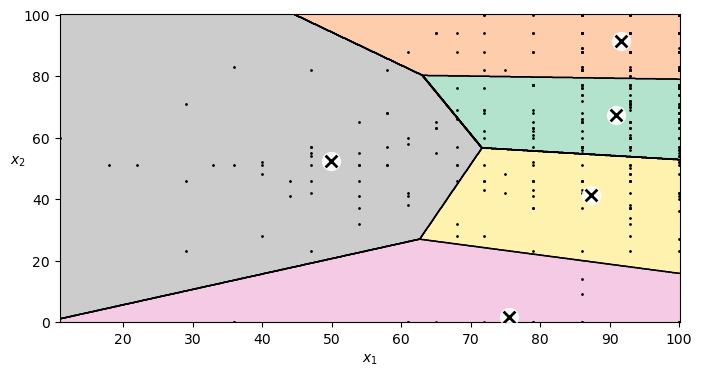

In [300]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

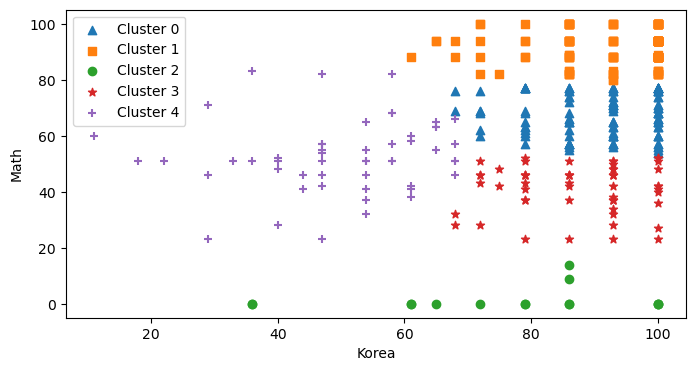

In [301]:
clu_col()

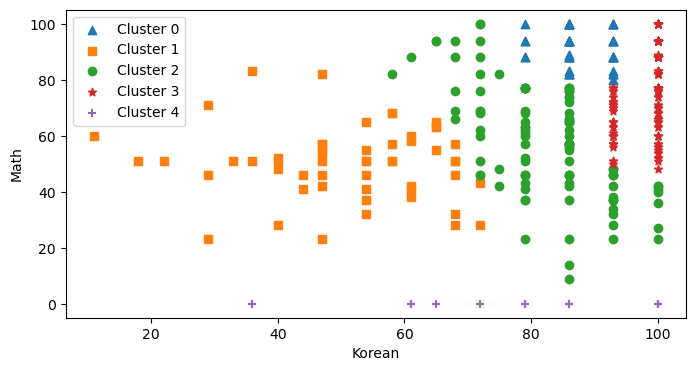

In [302]:
#Gmm 을 이용한 군집화
plt_gmm()

#### 느낀점

ex. 시각화결과를 보니 PCA가 ~~ 역할을 해준 것 같다.

ex. K-means를 항상 사용할 수 있을 까?